# Rendering the bin and boxes from the evaluation packing.

In [1]:
# Libraries
import numpy as np
import time

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
import matplotlib.pyplot as plt
from random import randint, seed
%matplotlib inline  
# %matplotlib notebook

seed(42)

In [13]:
# Default evaluation with boxes of different sizes
# eval_data_path = '../logs/evaluation/SqBinEval_acktr_01k-2022.08.20-22-58-36/trajs.npy'


Extract the box data from the evaluation file

In [3]:
def renderBoxData(eval_data_path, case = -1):
        eval_data_full = np.load(eval_data_path, allow_pickle=True)
        eval_data = eval_data_full[case]
        position = []
        opp_corner = []
        box_size = []
        den = []
        for i in range(len(eval_data)):
            box_size.append((eval_data[i][0],
                             eval_data[i][1],
                             eval_data[i][2]))
            position.append((eval_data[i][3],
                               eval_data[i][4],
                               eval_data[i][5]))
            opp_corner.append((eval_data[i][3] + eval_data[i][0],
                             eval_data[i][4] + eval_data[i][1],
                             eval_data[i][5] + eval_data[i][2]))
            den.append((eval_data[i][-1]))
        
        return position, box_size, opp_corner, den

[Code to plots cuboids in matplotlib](https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids)

In [4]:
# Edited from https://stackoverflow.com/questions/49277753/python-matplotlib-plotting-cuboids
def cuboid_data2(o, size=(1,1,1)):
    X = [[[0, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 0]],
         [[0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 0, 0]],
         [[1, 0, 1], [1, 0, 0], [1, 1, 0], [1, 1, 1]],
         [[0, 0, 1], [0, 0, 0], [0, 1, 0], [0, 1, 1]],
         [[0, 1, 0], [0, 1, 1], [1, 1, 1], [1, 1, 0]],
         [[0, 1, 1], [0, 0, 1], [1, 0, 1], [1, 1, 1]]]
    X = np.array(X).astype(float)
    for i in range(3):
        X[:,:,i] *= size[i]
    X += np.array(o)
    return X

def plotCubeAt2(positions,sizes=None,colors=None, **kwargs):
    if not isinstance(colors,(list,np.ndarray)): colors=["C0"]*len(positions)
    if not isinstance(sizes,(list,np.ndarray)): sizes=[(1,1,1)]*len(positions)
    g = []
    for p,s,c in zip(positions,sizes,colors):
        g.append( cuboid_data2(p, size=s) )
    return Poly3DCollection(np.concatenate(g),  
                            facecolors=np.repeat(colors,6), **kwargs)

In [20]:
def renderBin(eval_data_path, sqbin = True, pn = 3, case = -1):
    xsize = 10
    if sqbin == False: xsize = 20
    position, box_size, opp_corner, den = renderBoxData(eval_data_path, case)
    # colors from https://datascientyst.com/get-list-of-n-different-colors-names-python-pandas/
    color = []
    for i in range(len(position)):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    # plotting data
    for i in range(len(position)):
        positions = position[:i+1]
        sizes = box_size[:i+1]
        colors = color[:i+1]    
        # plots
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.set_aspect('auto')

        pc = plotCubeAt2(positions,sizes,colors=colors, edgecolor="k")
        ax.add_collection3d(pc)   
        
        

        ax.set_xlim([0,xsize])
        ax.set_ylim([0,10])
        ax.set_zlim([0,10])

        ax.set_xlabel('X ')
        ax.set_ylabel('Y ')
        ax.set_zlabel('Z ')
        
        ax.set_title(f"Number of Boxes {i+1}")

        fig1 = plt.gcf()
        plt.show()
        plt.draw()
        fig1.savefig(f"PackedBoxes_{i+1:03d}.jpg")
        plt.show()
        
    return(len(position))

# Random Boxes

In [21]:
!ls ../logs/evaluation/SqBinRandomBoxEval_acktr_01k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.19-23-59-01.pt-2022.08.21-20-22-46/trajs.npy


../logs/evaluation/SqBinRandomBoxEval_acktr_01k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.19-23-59-01.pt-2022.08.21-20-22-46/trajs.npy


/tmp/ipykernel_30251/548697435.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


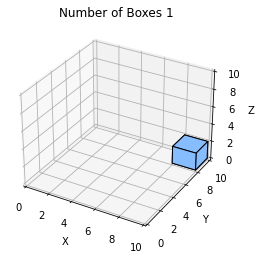

<Figure size 432x288 with 0 Axes>

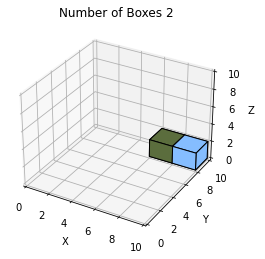

<Figure size 432x288 with 0 Axes>

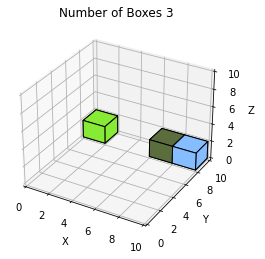

<Figure size 432x288 with 0 Axes>

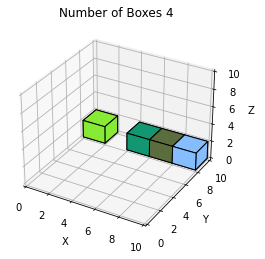

<Figure size 432x288 with 0 Axes>

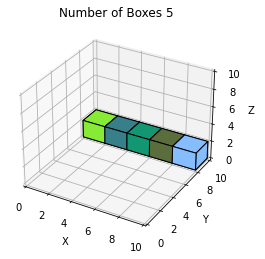

<Figure size 432x288 with 0 Axes>

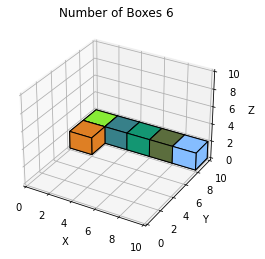

<Figure size 432x288 with 0 Axes>

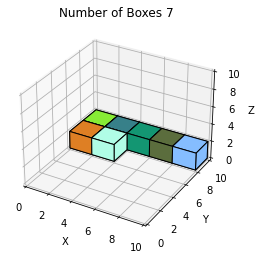

<Figure size 432x288 with 0 Axes>

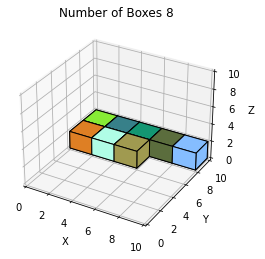

<Figure size 432x288 with 0 Axes>

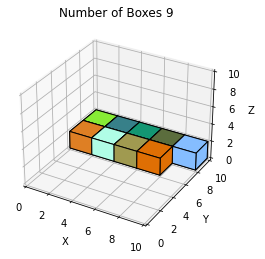

<Figure size 432x288 with 0 Axes>

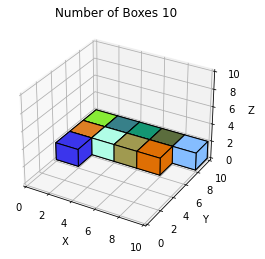

<Figure size 432x288 with 0 Axes>

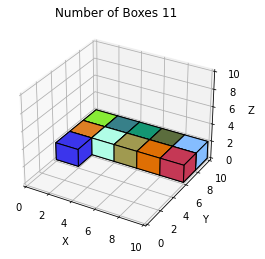

<Figure size 432x288 with 0 Axes>

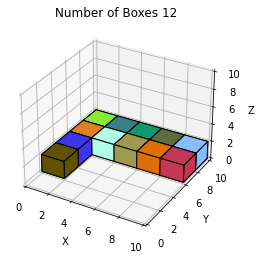

<Figure size 432x288 with 0 Axes>

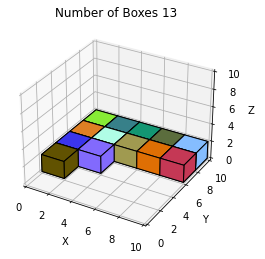

<Figure size 432x288 with 0 Axes>

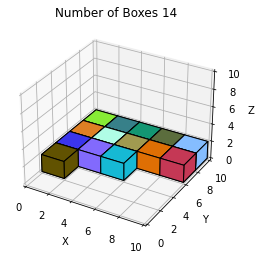

<Figure size 432x288 with 0 Axes>

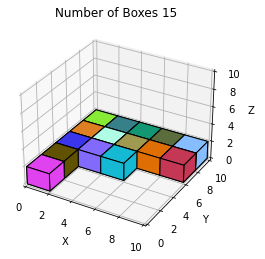

<Figure size 432x288 with 0 Axes>

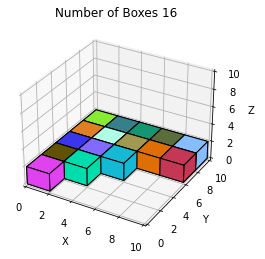

<Figure size 432x288 with 0 Axes>

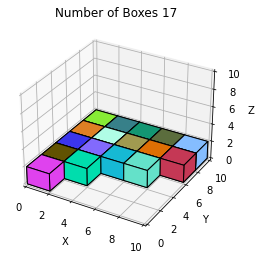

<Figure size 432x288 with 0 Axes>

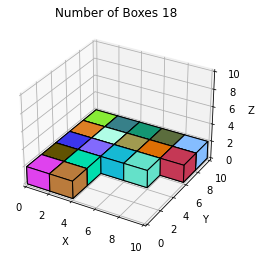

<Figure size 432x288 with 0 Axes>

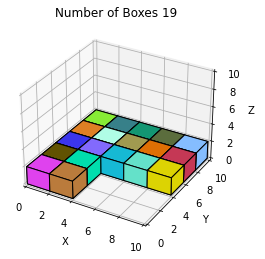

<Figure size 432x288 with 0 Axes>

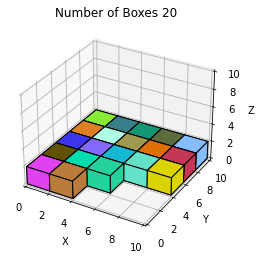

<Figure size 432x288 with 0 Axes>

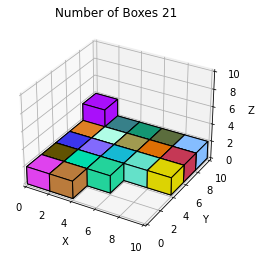

<Figure size 432x288 with 0 Axes>

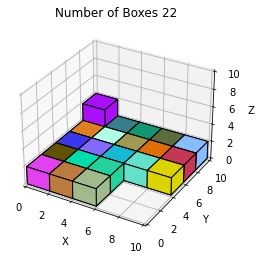

<Figure size 432x288 with 0 Axes>

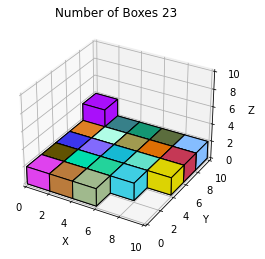

<Figure size 432x288 with 0 Axes>

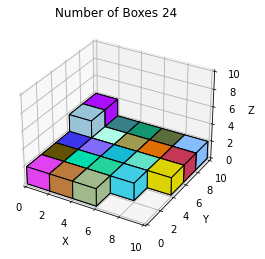

<Figure size 432x288 with 0 Axes>

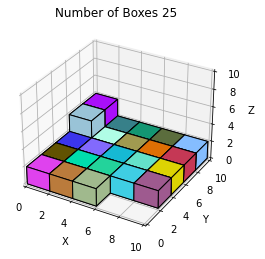

<Figure size 432x288 with 0 Axes>

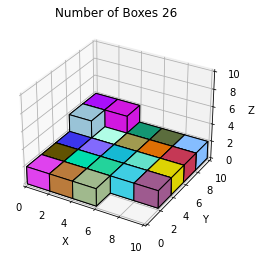

<Figure size 432x288 with 0 Axes>

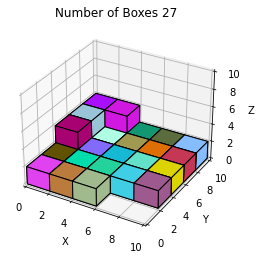

<Figure size 432x288 with 0 Axes>

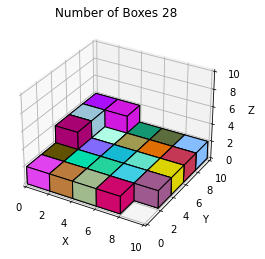

<Figure size 432x288 with 0 Axes>

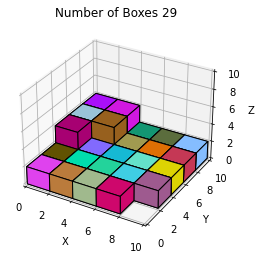

<Figure size 432x288 with 0 Axes>

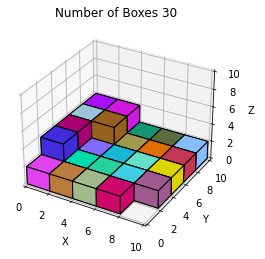

<Figure size 432x288 with 0 Axes>

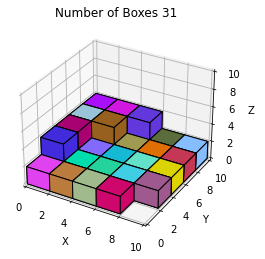

<Figure size 432x288 with 0 Axes>

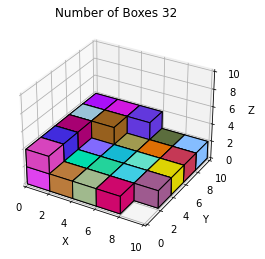

<Figure size 432x288 with 0 Axes>

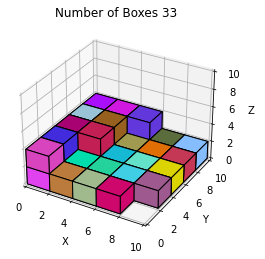

<Figure size 432x288 with 0 Axes>

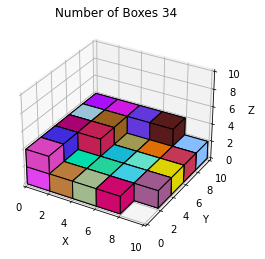

<Figure size 432x288 with 0 Axes>

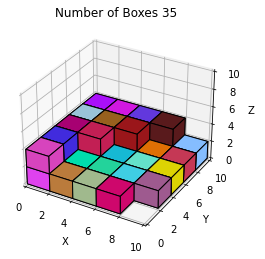

<Figure size 432x288 with 0 Axes>

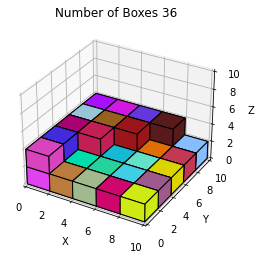

<Figure size 432x288 with 0 Axes>

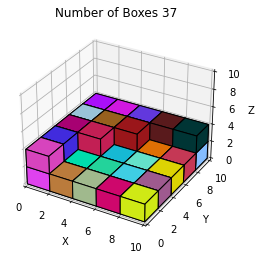

<Figure size 432x288 with 0 Axes>

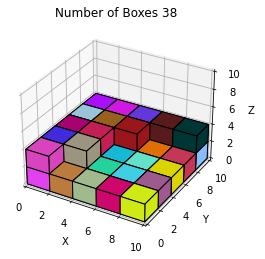

<Figure size 432x288 with 0 Axes>

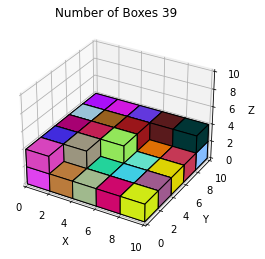

<Figure size 432x288 with 0 Axes>

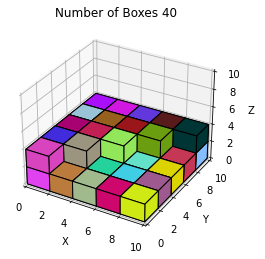

<Figure size 432x288 with 0 Axes>

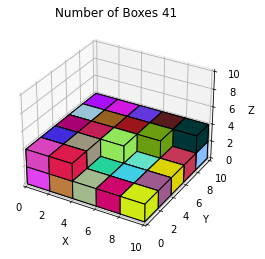

<Figure size 432x288 with 0 Axes>

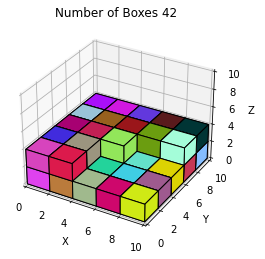

<Figure size 432x288 with 0 Axes>

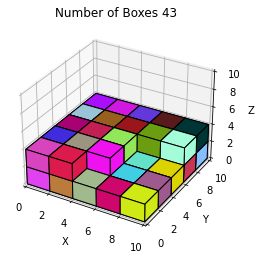

<Figure size 432x288 with 0 Axes>

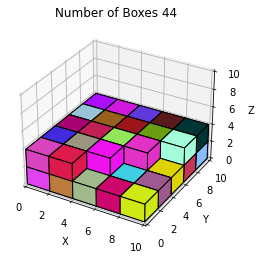

<Figure size 432x288 with 0 Axes>

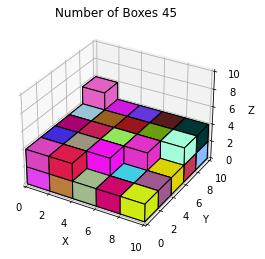

<Figure size 432x288 with 0 Axes>

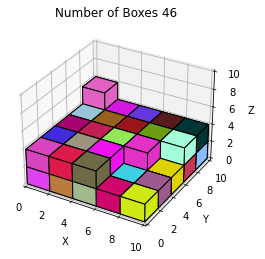

<Figure size 432x288 with 0 Axes>

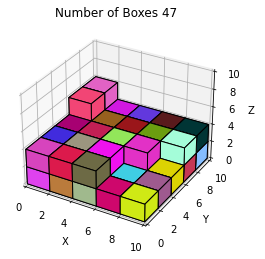

<Figure size 432x288 with 0 Axes>

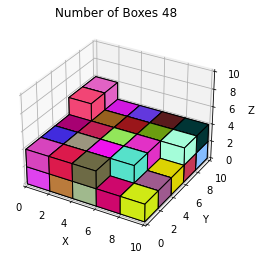

<Figure size 432x288 with 0 Axes>

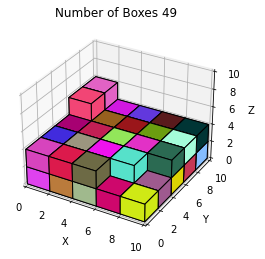

<Figure size 432x288 with 0 Axes>

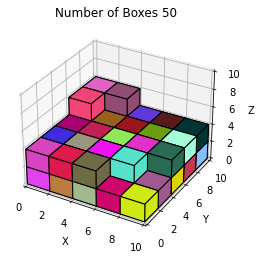

<Figure size 432x288 with 0 Axes>

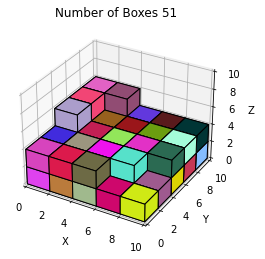

<Figure size 432x288 with 0 Axes>

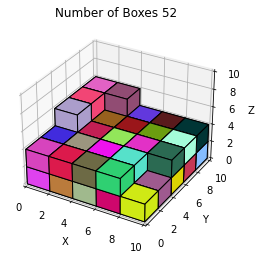

<Figure size 432x288 with 0 Axes>

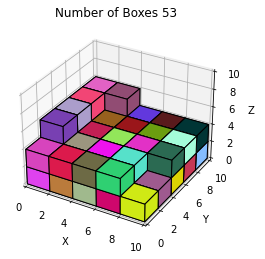

<Figure size 432x288 with 0 Axes>

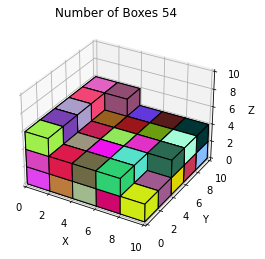

<Figure size 432x288 with 0 Axes>

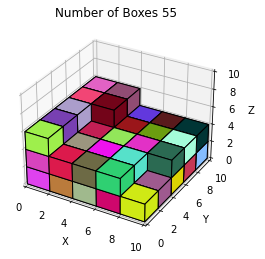

<Figure size 432x288 with 0 Axes>

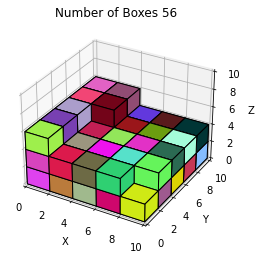

<Figure size 432x288 with 0 Axes>

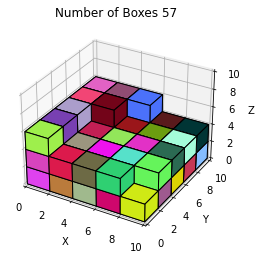

<Figure size 432x288 with 0 Axes>

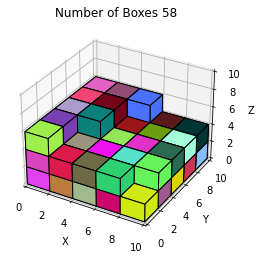

<Figure size 432x288 with 0 Axes>

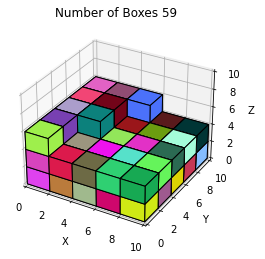

<Figure size 432x288 with 0 Axes>

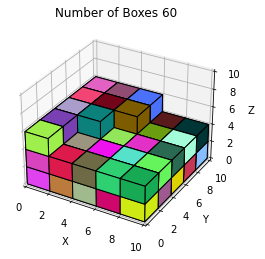

<Figure size 432x288 with 0 Axes>

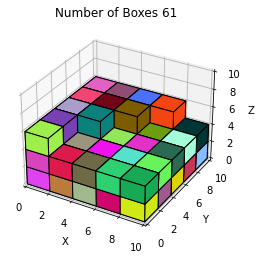

<Figure size 432x288 with 0 Axes>

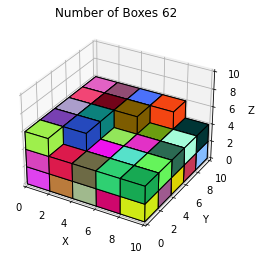

<Figure size 432x288 with 0 Axes>

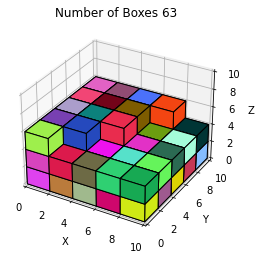

<Figure size 432x288 with 0 Axes>

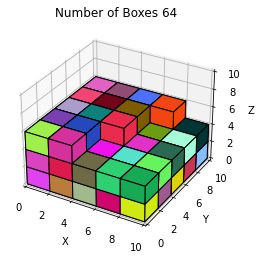

<Figure size 432x288 with 0 Axes>

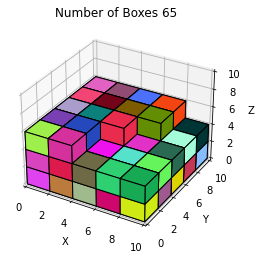

<Figure size 432x288 with 0 Axes>

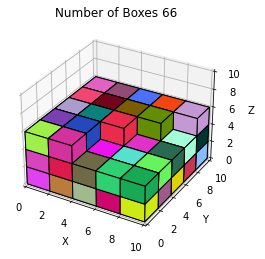

<Figure size 432x288 with 0 Axes>

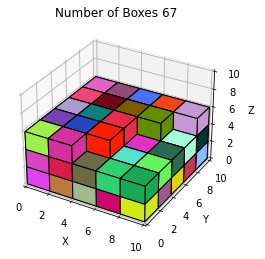

<Figure size 432x288 with 0 Axes>

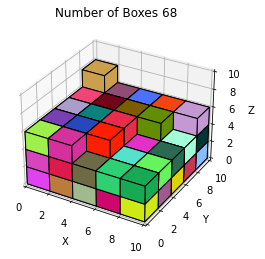

<Figure size 432x288 with 0 Axes>

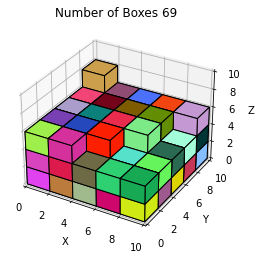

<Figure size 432x288 with 0 Axes>

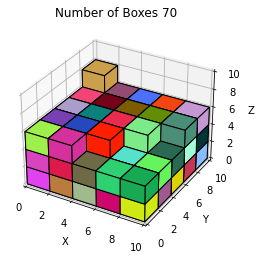

<Figure size 432x288 with 0 Axes>

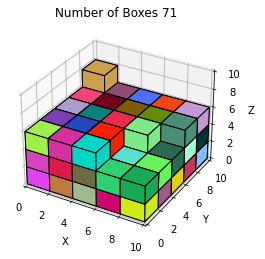

<Figure size 432x288 with 0 Axes>

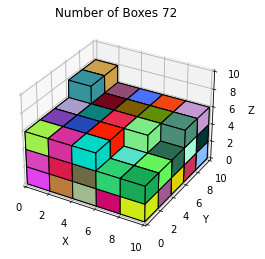

<Figure size 432x288 with 0 Axes>

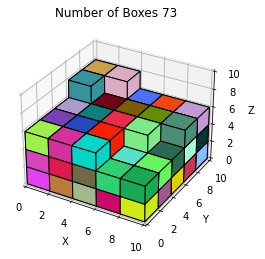

<Figure size 432x288 with 0 Axes>

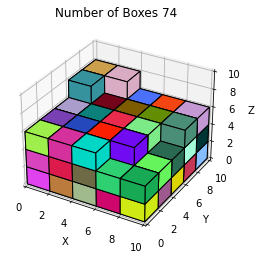

<Figure size 432x288 with 0 Axes>

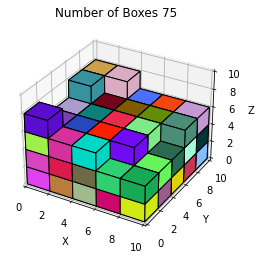

<Figure size 432x288 with 0 Axes>

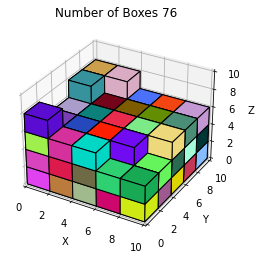

<Figure size 432x288 with 0 Axes>

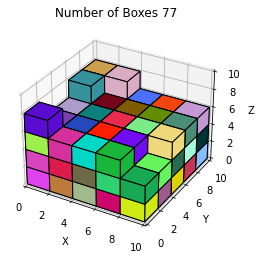

<Figure size 432x288 with 0 Axes>

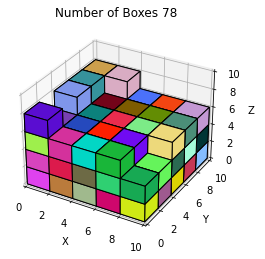

<Figure size 432x288 with 0 Axes>

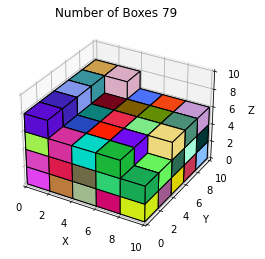

<Figure size 432x288 with 0 Axes>

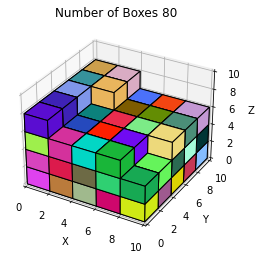

<Figure size 432x288 with 0 Axes>

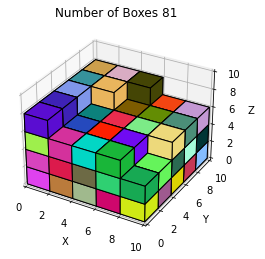

<Figure size 432x288 with 0 Axes>

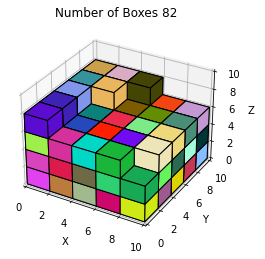

<Figure size 432x288 with 0 Axes>

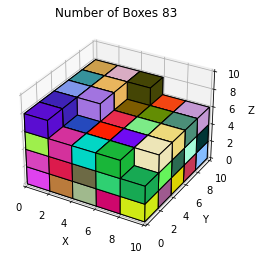

<Figure size 432x288 with 0 Axes>

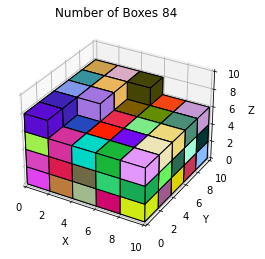

<Figure size 432x288 with 0 Axes>

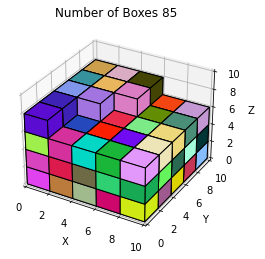

<Figure size 432x288 with 0 Axes>

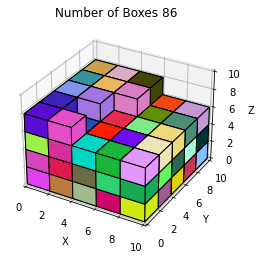

<Figure size 432x288 with 0 Axes>

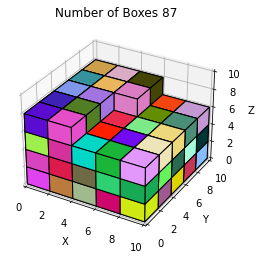

<Figure size 432x288 with 0 Axes>

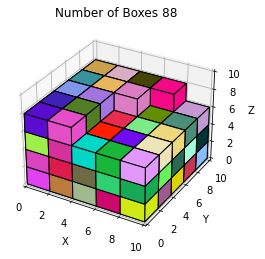

<Figure size 432x288 with 0 Axes>

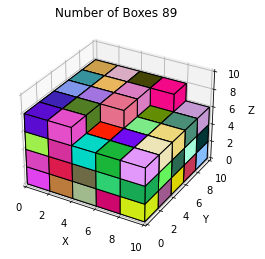

<Figure size 432x288 with 0 Axes>

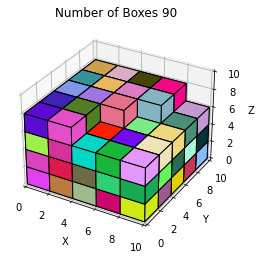

<Figure size 432x288 with 0 Axes>

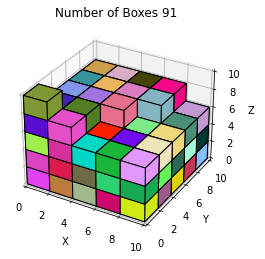

<Figure size 432x288 with 0 Axes>

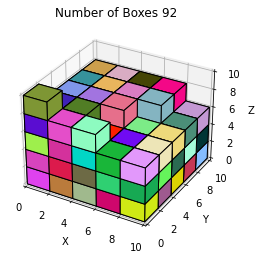

<Figure size 432x288 with 0 Axes>

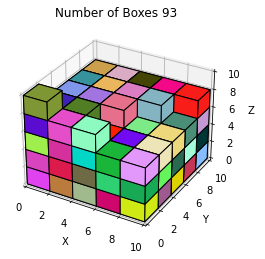

<Figure size 432x288 with 0 Axes>

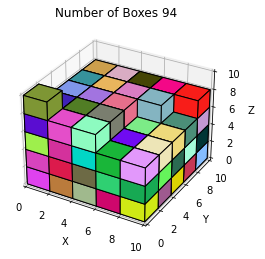

<Figure size 432x288 with 0 Axes>

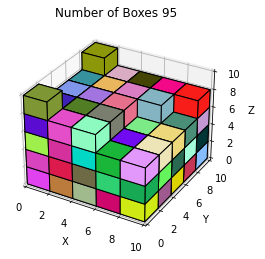

<Figure size 432x288 with 0 Axes>

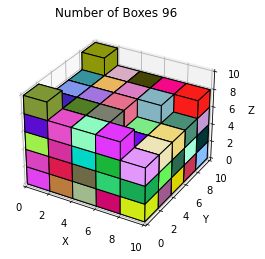

<Figure size 432x288 with 0 Axes>

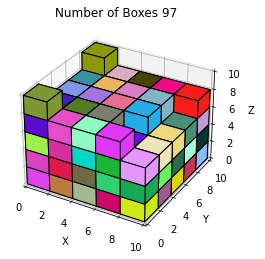

<Figure size 432x288 with 0 Axes>

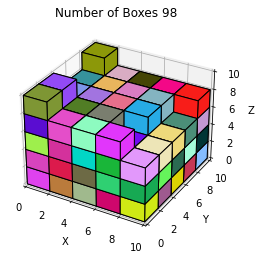

<Figure size 432x288 with 0 Axes>

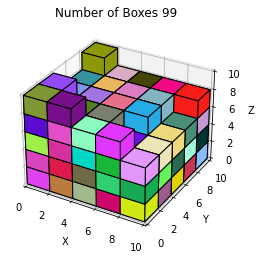

<Figure size 432x288 with 0 Axes>

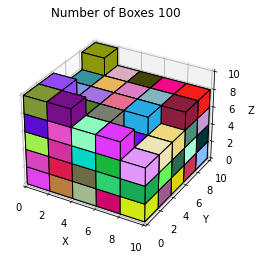

<Figure size 432x288 with 0 Axes>

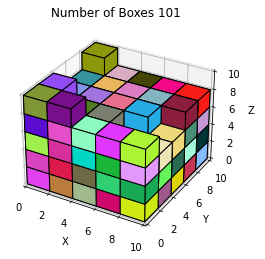

<Figure size 432x288 with 0 Axes>

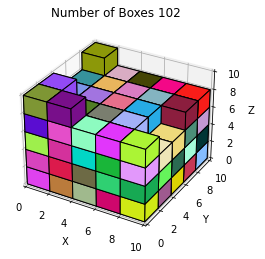

<Figure size 432x288 with 0 Axes>

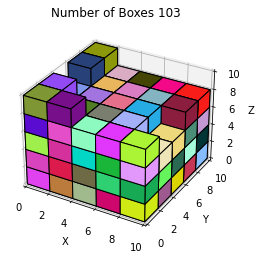

<Figure size 432x288 with 0 Axes>

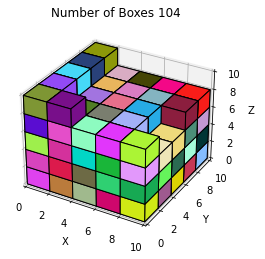

<Figure size 432x288 with 0 Axes>

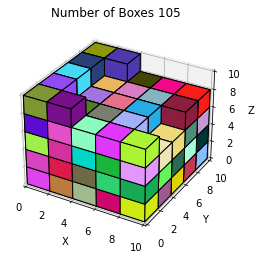

<Figure size 432x288 with 0 Axes>

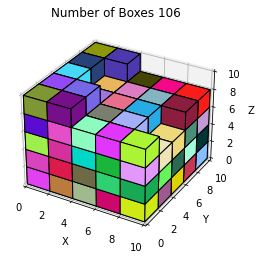

<Figure size 432x288 with 0 Axes>

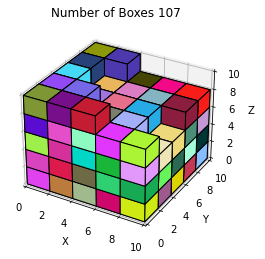

<Figure size 432x288 with 0 Axes>

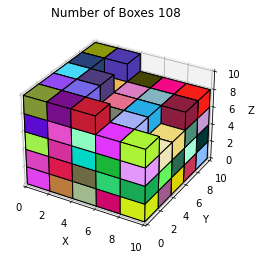

<Figure size 432x288 with 0 Axes>

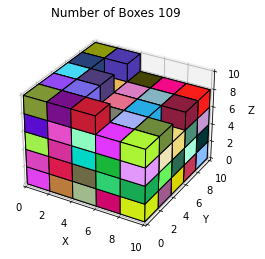

<Figure size 432x288 with 0 Axes>

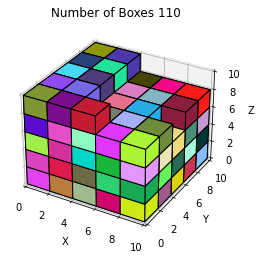

<Figure size 432x288 with 0 Axes>

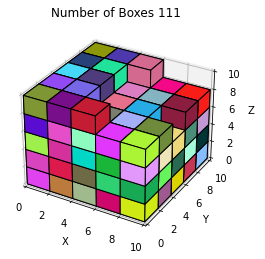

<Figure size 432x288 with 0 Axes>

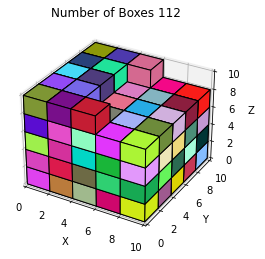

<Figure size 432x288 with 0 Axes>

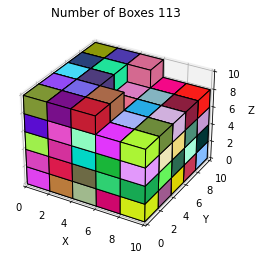

<Figure size 432x288 with 0 Axes>

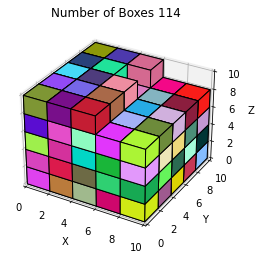

<Figure size 432x288 with 0 Axes>

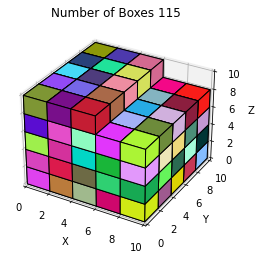

<Figure size 432x288 with 0 Axes>

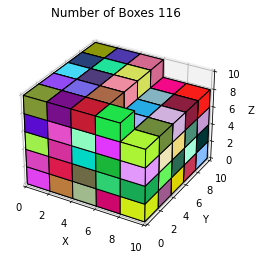

<Figure size 432x288 with 0 Axes>

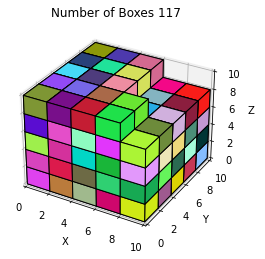

<Figure size 432x288 with 0 Axes>

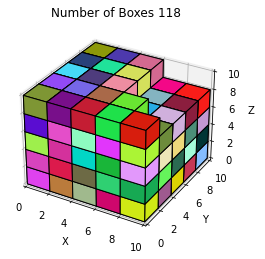

<Figure size 432x288 with 0 Axes>

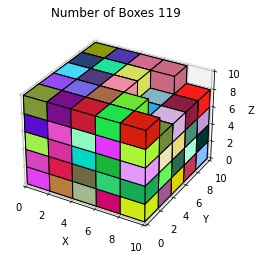

<Figure size 432x288 with 0 Axes>

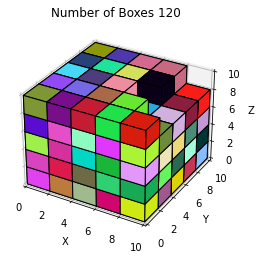

<Figure size 432x288 with 0 Axes>

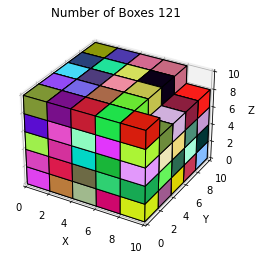

<Figure size 432x288 with 0 Axes>

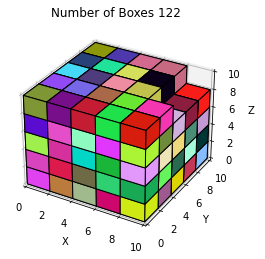

<Figure size 432x288 with 0 Axes>

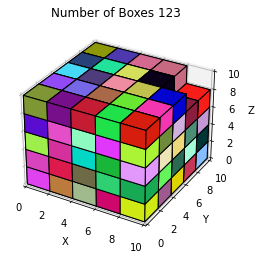

<Figure size 432x288 with 0 Axes>

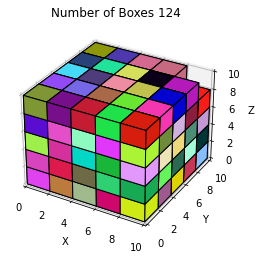

<Figure size 432x288 with 0 Axes>

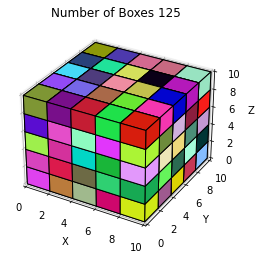

<Figure size 432x288 with 0 Axes>

125

In [24]:
# Evaluating at 1k Updates wih acktr agent
eval_data_path = "../logs/evaluation/SqBinRandomBoxEval_acktr_01k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.19-23-59-01.pt-2022.08.21-20-22-46/trajs.npy"
renderBin(eval_data_path, case = -1)

/tmp/ipykernel_30251/548697435.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


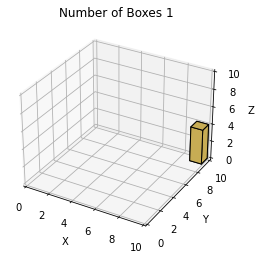

<Figure size 432x288 with 0 Axes>

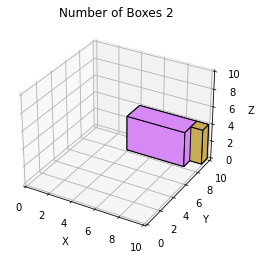

<Figure size 432x288 with 0 Axes>

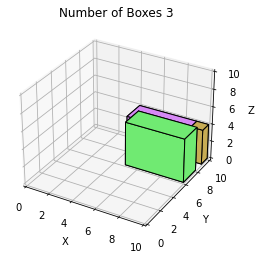

<Figure size 432x288 with 0 Axes>

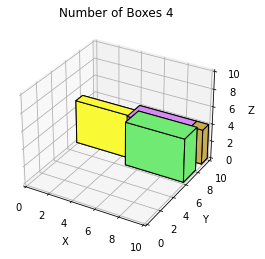

<Figure size 432x288 with 0 Axes>

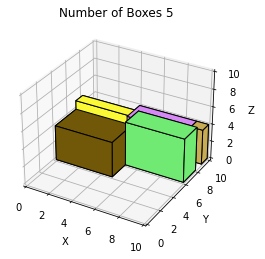

<Figure size 432x288 with 0 Axes>

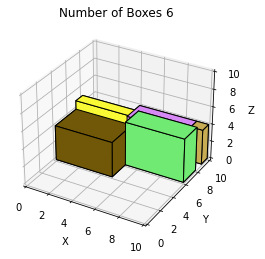

<Figure size 432x288 with 0 Axes>

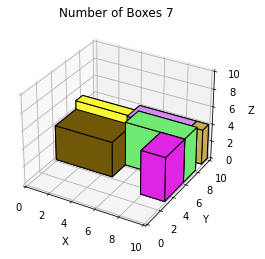

<Figure size 432x288 with 0 Axes>

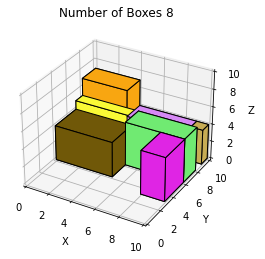

<Figure size 432x288 with 0 Axes>

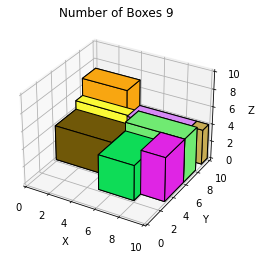

<Figure size 432x288 with 0 Axes>

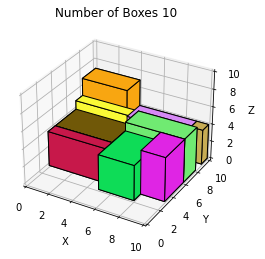

<Figure size 432x288 with 0 Axes>

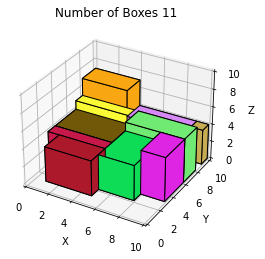

<Figure size 432x288 with 0 Axes>

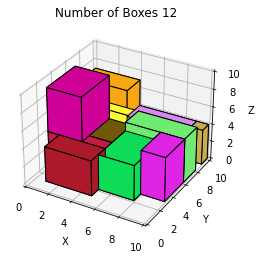

<Figure size 432x288 with 0 Axes>

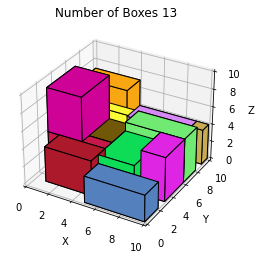

<Figure size 432x288 with 0 Axes>

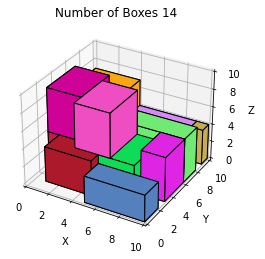

<Figure size 432x288 with 0 Axes>

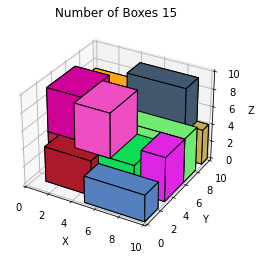

<Figure size 432x288 with 0 Axes>

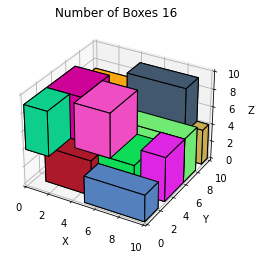

<Figure size 432x288 with 0 Axes>

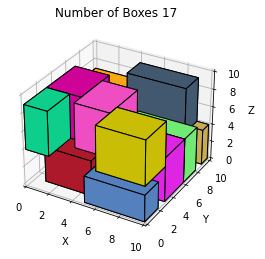

<Figure size 432x288 with 0 Axes>

17

In [25]:
# Evaluating at 1k Updates wih acktr agent
eval_data_path = '../logs/evaluation/SqBinRandomBoxEval_acktr_01k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.19-23-59-01.pt-2022.08.21-22-10-42/trajs.npy'
renderBin(eval_data_path, case = -1)

/tmp/ipykernel_62013/3980817079.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


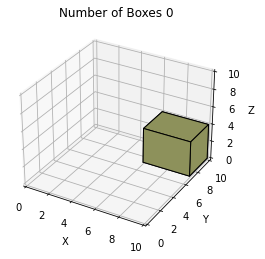

<Figure size 432x288 with 0 Axes>

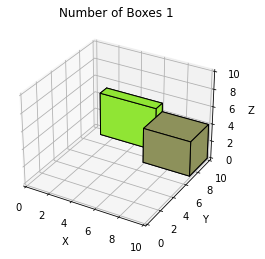

<Figure size 432x288 with 0 Axes>

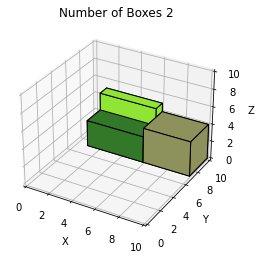

<Figure size 432x288 with 0 Axes>

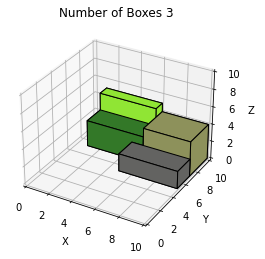

<Figure size 432x288 with 0 Axes>

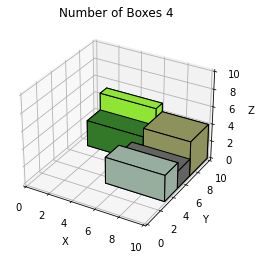

<Figure size 432x288 with 0 Axes>

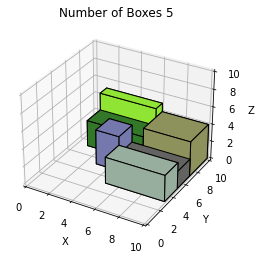

<Figure size 432x288 with 0 Axes>

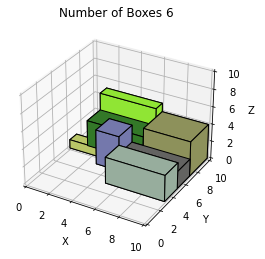

<Figure size 432x288 with 0 Axes>

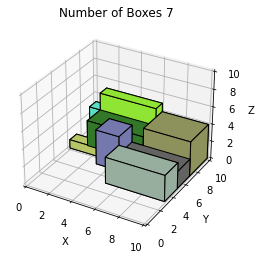

<Figure size 432x288 with 0 Axes>

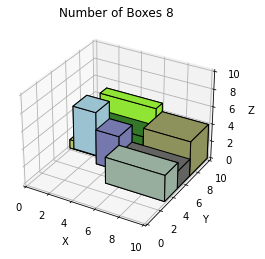

<Figure size 432x288 with 0 Axes>

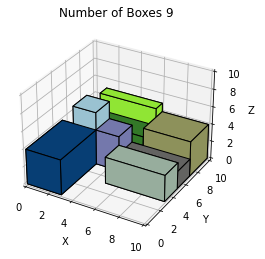

<Figure size 432x288 with 0 Axes>

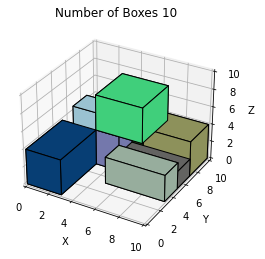

<Figure size 432x288 with 0 Axes>

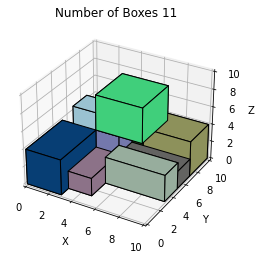

<Figure size 432x288 with 0 Axes>

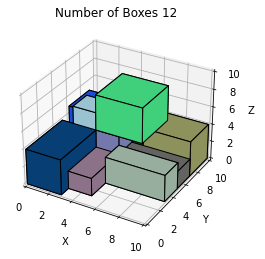

<Figure size 432x288 with 0 Axes>

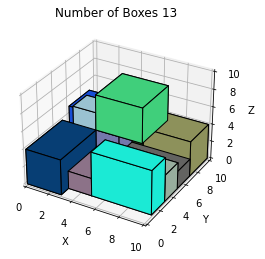

<Figure size 432x288 with 0 Axes>

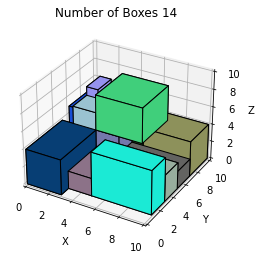

<Figure size 432x288 with 0 Axes>

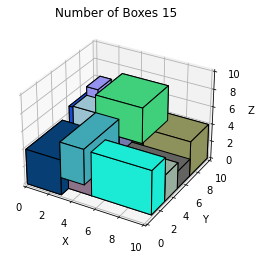

<Figure size 432x288 with 0 Axes>

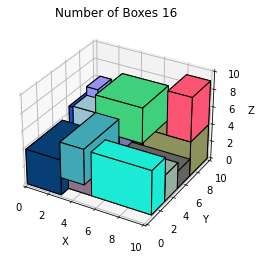

<Figure size 432x288 with 0 Axes>

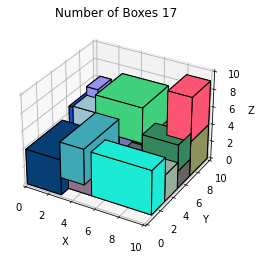

<Figure size 432x288 with 0 Axes>

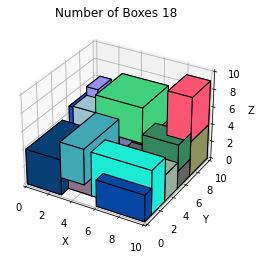

<Figure size 432x288 with 0 Axes>

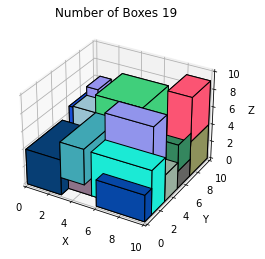

<Figure size 432x288 with 0 Axes>

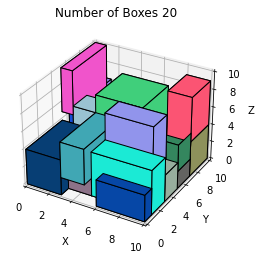

<Figure size 432x288 with 0 Axes>

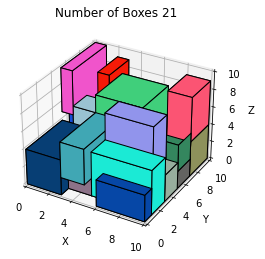

<Figure size 432x288 with 0 Axes>

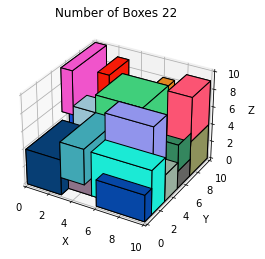

<Figure size 432x288 with 0 Axes>

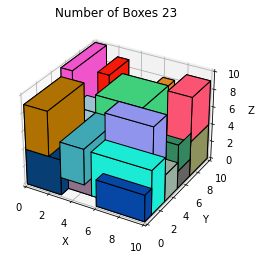

<Figure size 432x288 with 0 Axes>

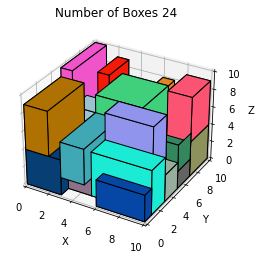

25

<Figure size 432x288 with 0 Axes>

In [40]:
# Evaluating at 2k Updates wih acktr agent
eval_data_path = '../logs/evaluation/SqBinRandomBoxEval_acktr_02k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.20-00-10-07.pt -2022.08.21-21-30-48/trajs.npy'

renderBin(eval_data_path, case = -1)

/tmp/ipykernel_62013/3980817079.py:16: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


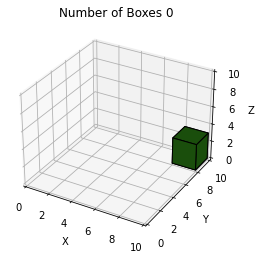

<Figure size 432x288 with 0 Axes>

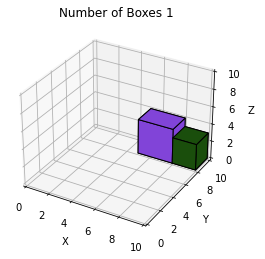

<Figure size 432x288 with 0 Axes>

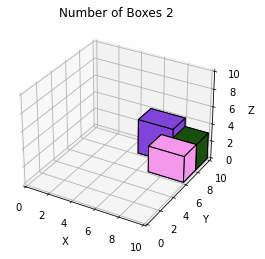

<Figure size 432x288 with 0 Axes>

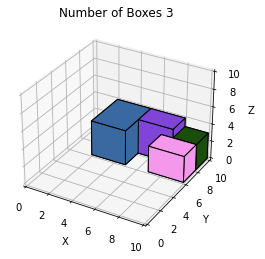

<Figure size 432x288 with 0 Axes>

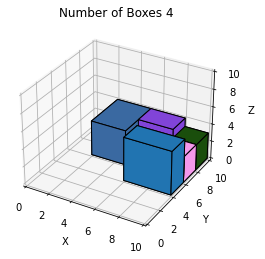

<Figure size 432x288 with 0 Axes>

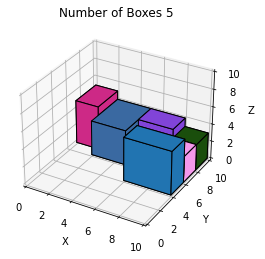

<Figure size 432x288 with 0 Axes>

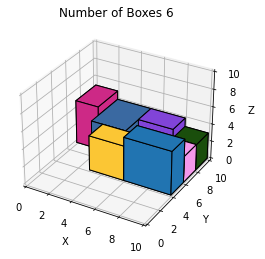

<Figure size 432x288 with 0 Axes>

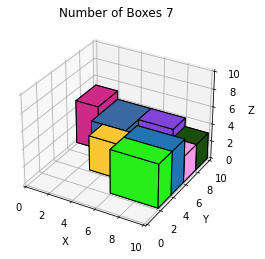

<Figure size 432x288 with 0 Axes>

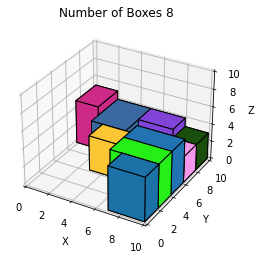

<Figure size 432x288 with 0 Axes>

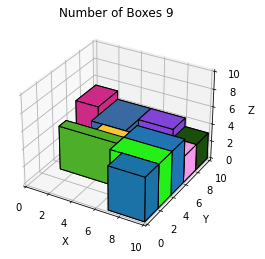

<Figure size 432x288 with 0 Axes>

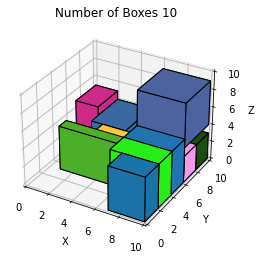

<Figure size 432x288 with 0 Axes>

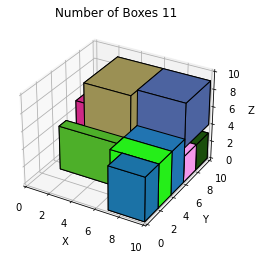

<Figure size 432x288 with 0 Axes>

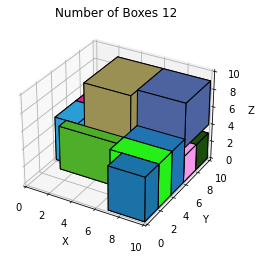

<Figure size 432x288 with 0 Axes>

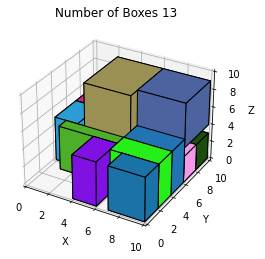

<Figure size 432x288 with 0 Axes>

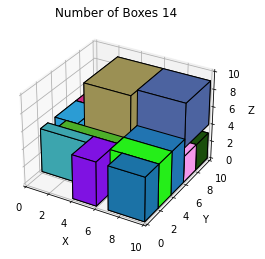

<Figure size 432x288 with 0 Axes>

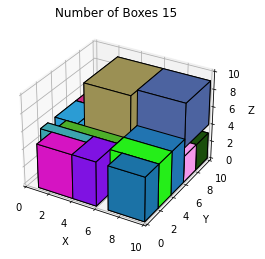

<Figure size 432x288 with 0 Axes>

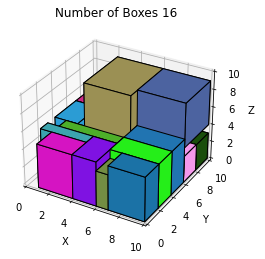

<Figure size 432x288 with 0 Axes>

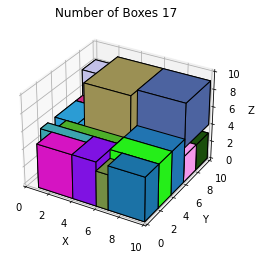

<Figure size 432x288 with 0 Axes>

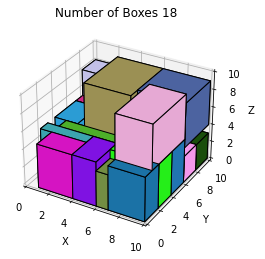

<Figure size 432x288 with 0 Axes>

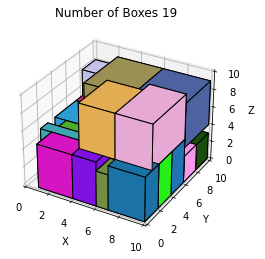

<Figure size 432x288 with 0 Axes>

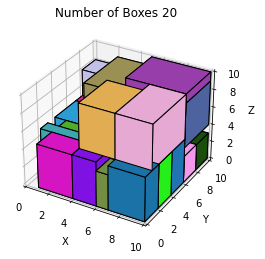

<Figure size 432x288 with 0 Axes>

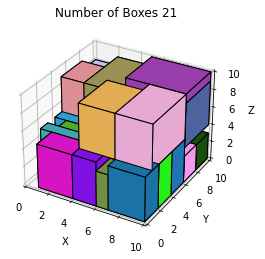

<Figure size 432x288 with 0 Axes>

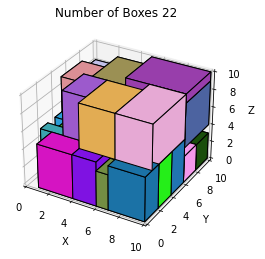

<Figure size 432x288 with 0 Axes>

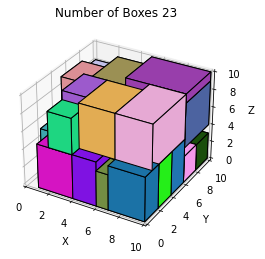

<Figure size 432x288 with 0 Axes>

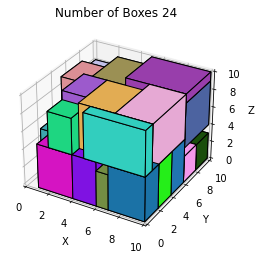

<Figure size 432x288 with 0 Axes>

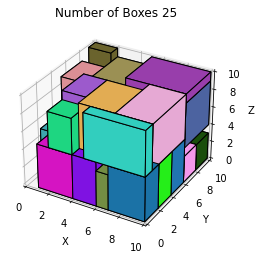

<Figure size 432x288 with 0 Axes>

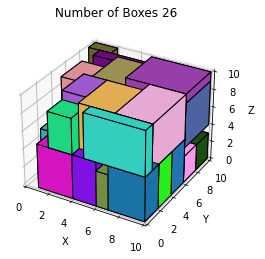

<Figure size 432x288 with 0 Axes>

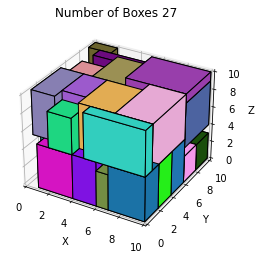

28

<Figure size 432x288 with 0 Axes>

In [41]:
# Evaluating at 34k Updates wih acktr agent
eval_data_path = '../logs/evaluation/SqBinRandomBoxEval_acktr_34k.log___PCT-Discrete_acktr_10x10x10Bin_s42_inh_800_defaultBox-2022.08.19-23-47-51_2022.08.20-06-02-10.pt-2022.08.21-22-02-26/trajs.npy'

renderBin(eval_data_path, case = -1)

In [ ]:
eval_data_path = '../logs/evaluation/Packing_acktr_SqBin-2022.08.18-00-27-02/trajs.npy'
renderBin(eval_data_path, case = -1)